In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import pdb
import json

In [2]:
dfTrain=pd.read_csv('/Users/sumit/Downloads/testWork/train-sample.csv')
dfTrain.tail()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,Tag3,Tag4,Tag5,PostClosedDate,OpenStatus
140267,2982729,06/06/2010 01:03:41,8303,09/15/2008 15:40:08,520,34,Is it possible to implement bitwise operators ...,I am facing a rather peculiar problem. I am wo...,bitwise-operators,discrete-mathematics,compiler-optimization,NaN,NaN,NaN,open
140268,8809105,01/10/2012 19:13:53,1130251,01/04/2012 15:31:10,1,0,Ruby on Rails: MySql Gem does not work: uninit...,I have the following installed:\r\nMac Os 10.7...,mysql,ruby-on-rails,gem,osx-lion,NaN,NaN,open
140269,10674791,05/20/2012 15:36:31,1388595,05/11/2012 04:43:47,4,0,deleting image from image folder,I am working with an asp.net application.I wan...,asp.net,NaN,NaN,NaN,NaN,05/21/2012 21:21:27,not a real question
140270,3997045,10/22/2010 13:04:30,484232,10/22/2010 13:04:30,1,0,Need help making HTML's,Hi to all the gurus out there.\r\n\r\nAnybody ...,html,copy,remove,move,NaN,10/22/2010 13:10:28,not a real question
140271,11570849,07/19/2012 23:36:57,1539253,07/19/2012 22:17:04,3,1,How dangerous is it to output certain content ...,Following on from a question I asked about esc...,php,content-management-system,NaN,NaN,NaN,NaN,open


In [6]:
#splitting the data into train and test with random split equal to true
dfTrain,dfTest=train_test_split(dfTrain,test_size=0.2)

In [7]:
trainPostId=dfTrain.PostId
testPostId=dfTest.PostId

In [8]:
#droping postCreationDate
dfTrain.drop(['PostCreationDate'],axis=1,inplace=True)
dfTest.drop(['PostCreationDate'],axis=1,inplace=True)

In [9]:
#extracting post count as a features
dfTrain['PostCount']=[1]*len(dfTrain['PostId'])

In [10]:
pd.pivot_table(dfTrain,index='OwnerUserId',columns='OpenStatus',values='PostCount',aggfunc='sum')

OpenStatus,not a real question,not constructive,off topic,open,too localized
OwnerUserId,,,,,
4,1.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,3.0,NaN
9,NaN,NaN,NaN,1.0,NaN
13,NaN,1.0,NaN,NaN,NaN
17,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...
1566847,NaN,NaN,1.0,NaN,NaN
1566856,1.0,NaN,NaN,NaN,NaN
1566884,NaN,NaN,NaN,1.0,NaN


In [11]:
dfTrain.loc[dfTrain['OpenStatus']=='open','OwnerUserId'].value_counts()

39677     24
34537     23
325418    18
185593    17
4653      16
          ..
197364     1
983827     1
684794     1
815132     1
237491     1
Name: OwnerUserId, Length: 35585, dtype: int64

In [12]:
dfTrain.drop(['OwnerUserId'],axis=1,inplace=True)
dfTest.drop(['OwnerUserId'],axis=1,inplace=True)

In [14]:
minimum=dfTrain['ReputationAtPostCreation'].min()
maximum=dfTrain['ReputationAtPostCreation'].max()

In [15]:
dfTrain['ReputationAtPostCreation']=(dfTrain['ReputationAtPostCreation']-minimum)/(maximum-minimum)

In [16]:
dfTest['ReputationAtPostCreation']=(dfTest['ReputationAtPostCreation']-minimum)/(maximum-minimum)

In [17]:
dfTrain.OwnerUndeletedAnswerCountAtPostTime.value_counts()

0       41787
1        8325
2        4761
3        3419
4        2554
        ...  
547         1
2722        1
739         1
1059        1
416         1
Name: OwnerUndeletedAnswerCountAtPostTime, Length: 783, dtype: int64

In [18]:
dfTrain.drop(['OwnerUndeletedAnswerCountAtPostTime'],axis=1,inplace=True)
dfTest.drop(['OwnerUndeletedAnswerCountAtPostTime'],axis=1,inplace=True)

In [19]:
dfTrain.drop(['PostClosedDate'],axis=1,inplace=True)
dfTest.drop(['PostClosedDate'],axis=1,inplace=True)

In [20]:
#removing nan values
dfTrain['Tag1']=dfTrain['Tag1'].replace(np.nan,' ')
dfTrain['Tag2']=dfTrain['Tag2'].replace(np.nan,' ')
dfTrain['Tag3']=dfTrain['Tag3'].replace(np.nan,' ')
dfTrain['Tag4']=dfTrain['Tag4'].replace(np.nan,' ')
dfTrain['Tag5']=dfTrain['Tag5'].replace(np.nan,' ')

dfTest['Tag1']=dfTest['Tag1'].replace(np.nan,' ')
dfTest['Tag2']=dfTest['Tag2'].replace(np.nan,' ')
dfTest['Tag3']=dfTest['Tag3'].replace(np.nan,' ')
dfTest['Tag4']=dfTest['Tag4'].replace(np.nan,' ')
dfTest['Tag5']=dfTest['Tag5'].replace(np.nan,' ')



In [21]:
dfTrain['Tags']=dfTrain['Tag1']+' '+dfTrain['Tag2']+' '+dfTrain['Tag3']+' '+dfTrain['Tag4']+' '+dfTrain['Tag5']

In [22]:
dfTest['Tags']=dfTest['Tag1']+' '+dfTest['Tag2']+' '+dfTest['Tag3']+' '+dfTest['Tag4']+' '+dfTest['Tag5']

In [23]:
dfTrain['Tags']=dfTrain['Tags'].str.lower()
dfTest['Tags']=dfTest['Tags'].str.lower()



In [24]:
dfTrain['Tags']=dfTrain['Tags'].apply(lambda x:x.lstrip())
dfTrain['Tags']=dfTrain['Tags'].apply(lambda x:x.rstrip())


In [25]:
dfTest['Tags']=dfTest['Tags'].apply(lambda x:x.lstrip())
dfTest['Tags']=dfTest['Tags'].apply(lambda x:x.rstrip())

In [26]:
# Dropping excess columns 
dfTrain.drop(['PostId','OwnerCreationDate','Tag1','Tag2','Tag3','Tag4','Tag5','PostCount'],axis=1,inplace=True)
dfTest.drop(['PostId','OwnerCreationDate','Tag1','Tag2','Tag3','Tag4','Tag5'],axis=1,inplace=True)

In [27]:
yTrain=dfTrain['OpenStatus']
yTest=dfTest['OpenStatus']

In [28]:
dfTrain.drop(['ReputationAtPostCreation','OpenStatus'],axis=1,inplace=True)
dfTest.drop(['ReputationAtPostCreation','OpenStatus'],axis=1,inplace=True)

In [29]:
yTrain=yTrain.map({'not a real question':0,'off topic':2,'open':3,'too localized':4,
  'not constructive':1})

In [30]:
yTest=yTest.map({'not a real question':0,
  'not constructive':1,
  'off topic':2,
  'open':3,
  'too localized':4})

In [31]:
dfTrain['Text']=dfTrain['Title']+' '+dfTrain['BodyMarkdown']+' '+dfTrain['Tags']
dfTest['Text']=dfTest['Title']+' '+dfTest['BodyMarkdown']+' '+dfTest['Tags']
dfTrain.drop(['Title','BodyMarkdown','Tags'],axis=1,inplace=True)
dfTest.drop(['Title','BodyMarkdown','Tags'],axis=1,inplace=True)

In [32]:
dfTrain.reset_index(inplace=True)
dfTest.reset_index(inplace=True)

In [33]:
dfTrain.drop(['index'],inplace=True,axis=1)
dfTest.drop(['index'],axis=1,inplace=True)



## CNN Model using Tensorflow  


In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
maxWords=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(dfTrain['Text'])
sequenceTrain=tokenizer.texts_to_sequences(dfTrain['Text'])
sequenceTest=tokenizer.texts_to_sequences(dfTest['Text'])

In [37]:
word2VecValue = tokenizer.word_index
VecValue = len(word2VecValue)
print('Dataset has {} number of independent tokens'.format(VecValue))

Dataset has 298855 number of independent tokens


In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
dataTrain=pad_sequences(sequenceTrain)
dataTrain.shape

(89773, 11314)

In [40]:
T=dataTrain.shape[1]
dataTest=pad_sequences(sequenceTest,maxlen=T)
dataTest.shape

(22444, 11314)

In [43]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
D=15
i=Input((T,))
x=Embedding(VecValue+1,D)(i)
x=Conv1D(16,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 11314)]           0         
_________________________________________________________________
embedding (Embedding)        (None, 11314, 15)         4482840   
_________________________________________________________________
conv1d (Conv1D)              (None, 11312, 16)         736       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3770, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3768, 32)          1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1256, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1254, 64)          6208  

In [44]:
#compiling Model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
sentimentModel = model.fit(dataTrain,yTrain,validation_data=(dataTest,yTest),batch_size=100,epochs=5)

Epoch 1/5
898/898 [==============================] - 362s 403ms/step - loss: 1.2162 - accuracy: 0.5351 - val_loss: 0.9680 - val_accuracy: 0.6309
Epoch 2/5
898/898 [==============================] - 351s 390ms/step - loss: 0.9186 - accuracy: 0.6540 - val_loss: 0.9272 - val_accuracy: 0.6513
Epoch 3/5
898/898 [==============================] - 353s 393ms/step - loss: 0.8410 - accuracy: 0.6864 - val_loss: 0.9256 - val_accuracy: 0.6517
Epoch 4/5
898/898 [==============================] - 354s 394ms/step - loss: 0.7852 - accuracy: 0.7099 - val_loss: 0.9404 - val_accuracy: 0.6495
Epoch 5/5
898/898 [==============================] - 352s 392ms/step - loss: 0.7305 - accuracy: 0.7326 - val_loss: 0.9600 - val_accuracy: 0.6437


In [45]:
model.predict(dataTest)
yPred=model.predict(dataTest)
yPred_final=np.argmax(yPred,axis=1)
yPred_final

array([3, 3, 0, ..., 0, 3, 3])

Text(33.0, 0.5, 'Y Pred')

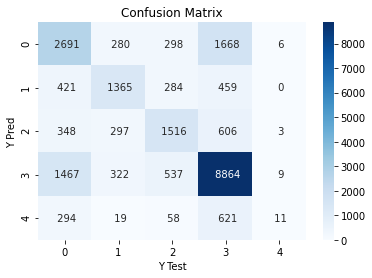

In [47]:
cnfMatrix = confusion_matrix(yTest,yPred_final)
axl = sns.heatmap(cnfMatrix,cmap='Blues',annot=True,fmt=' ')
axl.set_title('Confusion Matrix')
axl.set_xlabel('Y Test')
axl.set_ylabel('Y Pred')

In [48]:
print(classification_report(yTest,yPred_final))
dfSubmission=pd.DataFrame(testPostId,columns=['PostId'])
dfSubmission.head()

              precision    recall  f1-score   support

           0       0.52      0.54      0.53      4943
           1       0.60      0.54      0.57      2529
           2       0.56      0.55      0.56      2770
           3       0.73      0.79      0.76     11199
           4       0.38      0.01      0.02      1003

    accuracy                           0.64     22444
   macro avg       0.56      0.49      0.49     22444
weighted avg       0.63      0.64      0.63     22444



,PostId
107678,9749407
69730,11711594
70342,5242452
139621,7288423
1440,10924397


In [49]:
testPostId.reset_index(drop=True)
dfSubmissionV1=pd.DataFrame(yPred,columns=[0,1,2,3,4])

In [51]:
dfSubmissionV1['PostId']=list(testPostId)

In [52]:
columns=['PostId',0,1,2,3,4]
dfSubmissionV1=dfSubmissionV1[columns]
dfSubmissionV1

,PostId,0,1,2,3,4
0,9749407,0.330217,0.011872,0.018027,0.596261,0.043624
1,11711594,0.394320,0.027873,0.003172,0.528002,0.046633
2,5242452,0.762372,0.047002,0.041927,0.084351,0.064348
3,7288423,0.037914,0.002076,0.002885,0.899082,0.058043
4,10924397,0.103340,0.002809,0.005525,0.843499,0.044827
...,...,...,...,...,...,...
22439,4257415,0.010691,0.000594,0.000319,0.973703,0.014693
22440,11470352,0.161930,0.013623,0.445795,0.312773,0.065879
22441,8125915,0.607102,0.013347,0.053026,0.237592,0.088933
22442,7072626,0.006835,0.000126,0.000274,0.972170,0.020595


In [53]:
dfSubmissionV1['Sum']=dfSubmissionV1[0]+dfSubmissionV1[1]+dfSubmissionV1[2]+dfSubmissionV1[3]+dfSubmissionV1[4]
dfSubmissionV1.columns

Index(['PostId', 0, 1, 2, 3, 4, 'Sum'], dtype='object')